In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import time_series_preprocessor as tsp

timeseries = tsp.load_series('international-airline-passengers.csv')
print(timeseries)

[-1.40777884 -1.35759023 -1.24048348 -1.26557778 -1.33249593 -1.21538918
 -1.10664719 -1.10664719 -1.20702441 -1.34922546 -1.47469699 -1.35759023
 -1.38268454 -1.29067209 -1.16520057 -1.21538918 -1.29903686 -1.09828242
 -0.9226223  -0.9226223  -1.02299951 -1.23211871 -1.3910493  -1.17356534
 -1.1317415  -1.08991766 -0.85570415 -0.98117567 -0.90589276 -0.85570415
 -0.68004402 -0.68004402 -0.80551554 -0.98954044 -1.12337673 -0.95608137
 -0.91425753 -0.83897462 -0.73023263 -0.83060985 -0.81388031 -0.52111343
 -0.42073621 -0.320359   -0.59639634 -0.74696217 -0.90589276 -0.72186786
 -0.70513833 -0.70513833 -0.37054761 -0.37891237 -0.42910098 -0.31199423
 -0.1363341  -0.06941596 -0.36218284 -0.57966681 -0.83897462 -0.66331449
 -0.63822018 -0.77205647 -0.37891237 -0.44583052 -0.38727714 -0.1363341
  0.18152708  0.10624417 -0.17815794 -0.42910098 -0.64658495 -0.42910098
 -0.320359   -0.39564191 -0.1112398  -0.09451026 -0.08614549  0.29026907
  0.7001427   0.55794164  0.26517476 -0.05268642 -0.

In [3]:
print(np.shape(timeseries))

(144,)


No handles with labels found to put in legend.


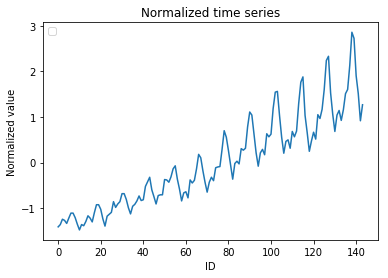

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(timeseries)
plt.title('Normalized time series')
plt.xlabel('ID')
plt.ylabel('Normalized value')
plt.legend(loc='upper left')
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import time_series_preprocessor as tsp
import matplotlib.pyplot as plt

In [7]:
input_dim = 1
seq_size = 5
hidden_dim = 5

In [8]:
W_out = tf.Variable(tf.random_normal([hidden_dim, 1]), name='W_out')
b_out = tf.Variable(tf.random_normal([1]), name='b_out')
x = tf.placeholder(tf.float32, [None, seq_size, input_dim])
y = tf.placeholder(tf.float32, [None, seq_size])

In [9]:
def LSTM_Model():
        cell = rnn_cell.BasicLSTMCell(hidden_dim)
        outputs, states = rnn.dynamic_rnn(cell, x, dtype=tf.float32)
        num_examples = tf.shape(x)[0]
        W_repeated = tf.tile(tf.expand_dims(W_out, 0), [num_examples, 1, 1])
        out = tf.matmul(outputs, W_repeated) + b_out
        out = tf.squeeze(out)
        return out

In [10]:
train_loss = []
test_loss = []
step_list = []

In [11]:
def trainNetwork(train_x, train_y, test_x, test_y):
        with tf.Session() as sess:
            tf.get_variable_scope().reuse_variables()
            sess.run(tf.global_variables_initializer())
            max_patience = 3
            patience = max_patience
            min_test_err = float('inf')
            step = 0
            while patience > 0:
                _, train_err = sess.run([train_op, cost], feed_dict={x: train_x, y: train_y})
                if step % 100 == 0:
                    test_err = sess.run(cost, feed_dict={x: test_x, y: test_y})
                    print('step: {}\t\ttrain err: {}\t\ttest err: {}'.format(step, train_err, test_err))
                    train_loss.append(train_err)
                    test_loss.append(test_err) 
                    step_list.append(step)                   

                    if test_err < min_test_err:
                        min_test_err = test_err
                        patience = max_patience
                    else:
                        patience -= 1
                step += 1                
            save_path = saver.save(sess, 'model/model.ckpt')
            print('Model saved to {}'.format(save_path))

In [12]:
cost = tf.reduce_mean(tf.square(LSTM_Model()- y))
train_op = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cost)

In [13]:
saver = tf.train.Saver()

In [14]:
def testLSTM(sess, test_x):
        tf.get_variable_scope().reuse_variables()
        saver.restore(sess, 'model/model.ckpt')
        output = sess.run(LSTM_Model(), feed_dict={x: test_x})
        return output

In [15]:
def plot_results(train_x, predictions, actual, filename):
    plt.figure()
    num_train = len(train_x)
    plt.plot(list(range(num_train)), train_x, color='b', label='training data')
    plt.plot(list(range(num_train, num_train + len(predictions))), predictions, color='r', label='predicted')
    plt.plot(list(range(num_train, num_train + len(actual))), actual, color='g', label='test data')
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()

Model evaluation

step: 0		train err: 5.236062049865723		test err: 0.7235438823699951
step: 100		train err: 1.1804078817367554		test err: 0.4602399170398712
step: 200		train err: 0.527389645576477		test err: 0.40618911385536194
step: 300		train err: 0.24578003585338593		test err: 0.33508434891700745
step: 400		train err: 0.09962588548660278		test err: 0.30334776639938354
step: 500		train err: 0.05573469027876854		test err: 0.3028036057949066
step: 600		train err: 0.04556182026863098		test err: 0.30516964197158813
step: 700		train err: 0.04325488582253456		test err: 0.30496811866760254
step: 800		train err: 0.04238009825348854		test err: 0.3028114438056946
Model saved to model/model.ckpt
INFO:tensorflow:Restoring parameters from model/model.ckpt
INFO:tensorflow:Restoring parameters from model/model.ckpt
INFO:tensorflow:Restoring parameters from model/model.ckpt
INFO:tensorflow:Restoring parameters from model/model.ckpt
INFO:tensorflow:Restoring parameters from model/model.ckpt
INFO:tensorflow:Restoring p

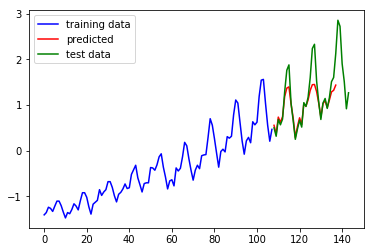

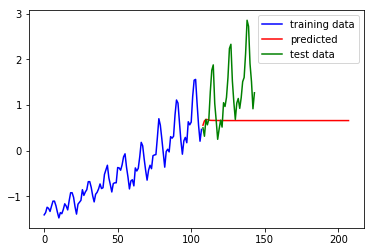

In [16]:
def main():    
    data = tsp.load_series('international-airline-passengers.csv')
    train_data, actual_vals = tsp.split_data(data=data, percent_train=0.75)

    train_x, train_y = [], []
    for i in range(len(train_data) - seq_size - 1):
        train_x.append(np.expand_dims(train_data[i:i+seq_size], axis=1).tolist())
        train_y.append(train_data[i+1:i+seq_size+1])

    test_x, test_y = [], []
    for i in range(len(actual_vals) - seq_size - 1):
        test_x.append(np.expand_dims(actual_vals[i:i+seq_size], axis=1).tolist())
        test_y.append(actual_vals[i+1:i+seq_size+1])

    trainNetwork(train_x, train_y, test_x, test_y)

    with tf.Session() as sess:
        predicted_vals = testLSTM(sess, test_x)[:,0]
        plot_results(train_data, predicted_vals, actual_vals, 'ground_truth_predition.png')
        prev_seq = train_x[-1]
        predicted_vals = []
        for i in range(100):
            next_seq = testLSTM(sess, [prev_seq])
            predicted_vals.append(next_seq[-1])
            prev_seq = np.vstack((prev_seq[1:], next_seq[-1]))
        plot_results(train_data, predicted_vals, actual_vals, 'prediction_on_train_set.png')

main()

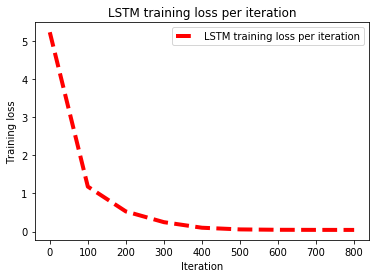

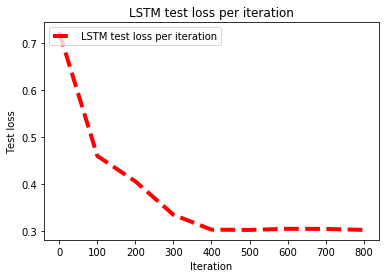

In [17]:
def plot_error():

    plt.plot(step_list, train_loss, 'r--', label='LSTM training loss per iteration', linewidth=4)
    plt.title('LSTM training loss per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Training loss')
    plt.legend(loc='upper right')
    plt.show()

    plt.plot(step_list, test_loss, 'r--', label='LSTM test loss per iteration', linewidth=4)
    plt.title('LSTM test loss per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Test loss')
    plt.legend(loc='upper left')
    plt.show()

plot_error()
